<a href="https://colab.research.google.com/github/Ishu2412/skin_disease_prediction/blob/main/skindiseasemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten,
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix,
                             accuracy_score)
# import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten,
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, accuracy_score)
# Base Libraries
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.pipeline import Pipeline
# Feature Selection


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train2=os.listdir('/content/drive/MyDrive/Data Set Skin Disease/train')

In [ ]:
train2

['Seborrheic Keratoses and other Benign Tumors',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Eczema Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions']

In [ ]:
def data_dictionary():
    path_train = "/content/drive/MyDrive/Data Set Skin Disease/train"
    path_test = "/content/drive/MyDrive/Data Set Skin Disease/test"
    list_train = os.listdir(path_train)
    list_test = os.listdir(path_test)
    train_dictionary = {"image_path":[],"target":[]}
    test_dictionary = {"image_path":[],"target":[]}
    k = 0
    for i in list_train:
        path_disease_train=path_train+ "/" + i
        # print(path_disease_train)
        image_list_train = os.listdir(path_disease_train)
        p = 0
        for j in image_list_train:
            img_path_train=  path_disease_train+"/"+j
            if img_path_train != "/content/drive/MyDrive/Data Set Skin Disease/train/Normal/34.avif":

                train_dictionary["image_path"].append(img_path_train)
                train_dictionary['target'].append(k)
            if p == 1400 :
              break
            p += 1
        k += 1
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [ ]:
train=data_dictionary()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7005 entries, 0 to 7004
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  7005 non-null   object
 1   target      7005 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 109.6+ KB


In [ ]:
train

,image_path,target
0,/content/drive/MyDrive/Data Set Skin Disease/t...,0
1,/content/drive/MyDrive/Data Set Skin Disease/t...,0
2,/content/drive/MyDrive/Data Set Skin Disease/t...,0
3,/content/drive/MyDrive/Data Set Skin Disease/t...,0
4,/content/drive/MyDrive/Data Set Skin Disease/t...,0
...,...,...
7000,/content/drive/MyDrive/Data Set Skin Disease/t...,4
7001,/content/drive/MyDrive/Data Set Skin Disease/t...,4
7002,/content/drive/MyDrive/Data Set Skin Disease/t...,4
7003,/content/drive/MyDrive/Data Set Skin Disease/t...,4


In [ ]:
# !pip install opencv-python
import cv2
# from tensorflow.keras import layers
# resize_and_rescale = tf.keras.Sequential([
#   layers.Resizing(180, 180),
#   layers.Rescaling(1./255)
# ])
images=[]
label=[]
for i in train['image_path']:
    img=cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(180,180))
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # img=cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
    # img=resize_and_rescale(tf.convert_to_tensor([img]))
    images.append(img)
    # print(img)

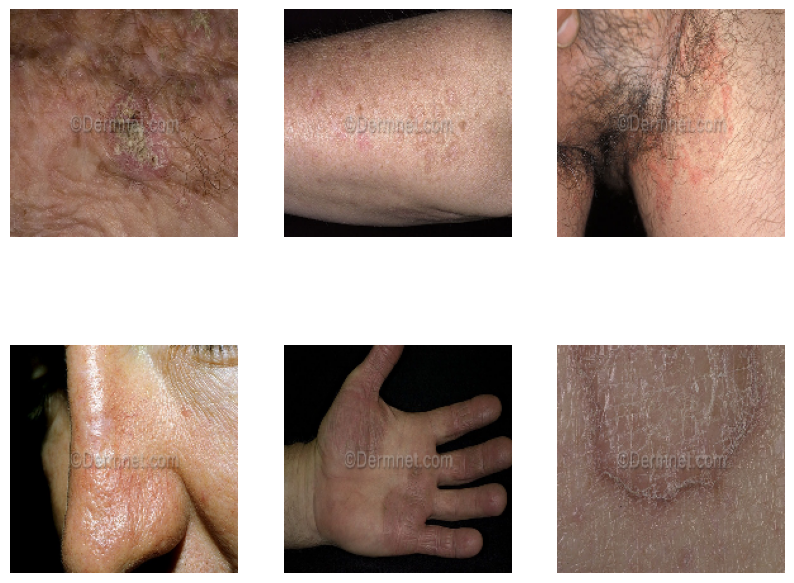

In [ ]:
# Create a list of example inputs to our Gradio demo
example_list = [image for image in random.sample(images, k=6)]

# Plot the images in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

for ax, img_array in zip(axes.ravel(), example_list):
    ax.imshow(img_array)
    ax.axis('off')

plt.show()

In [ ]:
label=train['target'] #output array

In [ ]:
len(label)

7005

In [ ]:
len(images)

7005

In [ ]:
data=np.array(images)
lable = np.array(label)

In [ ]:
data.shape, label.shape

((7005, 180, 180, 3), (7005,))

In [ ]:
!pip install sklearn_relief

In [ ]:
vgg_model = VGG19(weights = 'imagenet',  include_top = False, input_shape = (180, 180, 3))

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# let's make all layers non-trainable
for layer in vgg_model.layers :
    layer.trainable = False

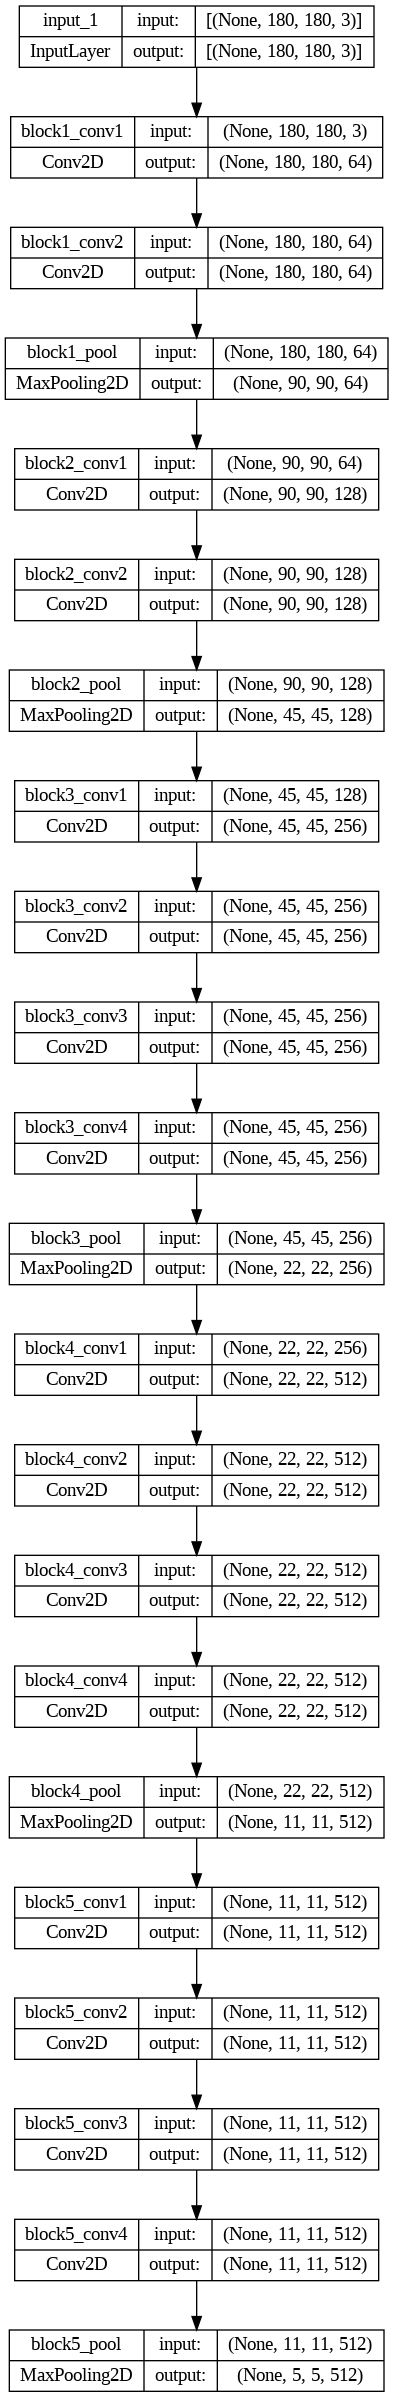

In [ ]:
from keras.utils import plot_model
plot_model(vgg_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense

In [ ]:
model=Sequential([

                    Dense(200,activation='relu'),
                  Dense(170,activation='relu'),
                  Dense(5,activation='softmax'),

])

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [ ]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
kf = KFold(n_splits = 3)

In [ ]:
import keras
acc=[]
num_classes = 5
label = keras.utils.to_categorical(label, num_classes)

In [ ]:
label.shape

(7005, 5)

In [ ]:
label

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
for i in range(3):
    x_train,x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state = 42)
    print(x_train.shape)
    # let's make all layers non-trainable
    for layer in vgg_model.layers :
        layer.trainable = False
    features_train=vgg_model.predict(x_train)
    features_test=vgg_model.predict(x_test)
    print(features_train.shape)
    num_train=x_train.shape[0]
    num_test=x_test.shape[0]
    print(num_train)
    print(num_test)
    x_test=features_test.reshape(num_test,-1)
    x_train=features_train.reshape(num_train,-1)
    print(x_train.shape)
    print(x_test.shape)

(5604, 180, 180, 3)


NameError: ignored

In [ ]:
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
176/176 [==============================] - 3s 5ms/step - loss: 2.4224 - accuracy: 0.3983
Epoch 2/50
176/176 [==============================] - 1s 5ms/step - loss: 1.0338 - accuracy: 0.6130
Epoch 3/50
176/176 [==============================] - 2s 10ms/step - loss: 0.6783 - accuracy: 0.7495
Epoch 4/50
176/176 [==============================] - 2s 10ms/step - loss: 0.4663 - accuracy: 0.8339
Epoch 5/50
176/176 [==============================] - 1s 6ms/step - loss: 0.3277 - accuracy: 0.8878
Epoch 6/50
176/176 [==============================] - 1s 4ms/step - loss: 0.2381 - accuracy: 0.9206
Epoch 7/50
176/176 [==============================] - 1s 4ms/step - loss: 0.2304 - accuracy: 0.9295
Epoch 8/50
176/176 [==============================] - 1s 4ms/step - loss: 0.2088 - accuracy: 0.9374
Epoch 9/50
176/176 [==============================] - 1s 4ms/step - loss: 0.2300 - accuracy: 0.9365
Epoch 10/50
176/176 [==============================] - 1s 4ms/step - loss: 0.2467 - accuracy: 0.92

In [ ]:
model.save('skin.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install mlxtend
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred2=np.argmax(y_pred, axis=0)
y_pred2

In [ ]:
y_test.shape

In [ ]:
# confusion_matrix_result=confusion_matrix(y_test,y_pred2)

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pylab as pl
# plt.title("skin detection  using VGG19 ")

# ax= plt.subplot()
# sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
# pl.show()

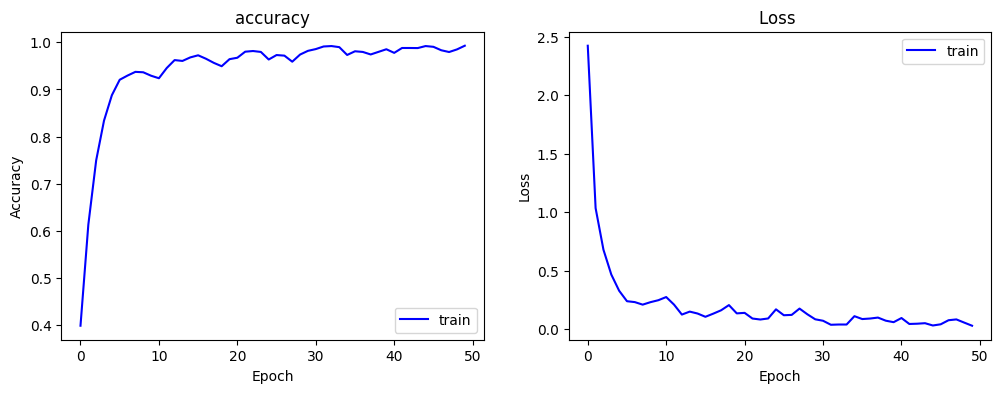

In [ ]:
train_accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))
# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')

plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')

plt.title('Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [ ]:
# confusion_matrix=classification_report(y_test,y_pred2)
# print(confusion_matrix)
train2
x_test = x_train
y_test = y_train

In [ ]:
def predict_skin_disease(image_path):
   # Define list of class names
    class_names = train2

    # Load saved model
    model = tf.keras.models.load_model('skin.h5')

    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg_model.predict(img)
    img = img.reshape(1, -1)

    # Make prediction on preprocessed image
    pred = model.predict(img)[0]
    print(pred)
    predicted_class_index = np.argmax(pred)
    print(predicted_class_index)
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name


In [ ]:
print(predict_skin_disease("/content/drive/MyDrive/Data Set Skin Disease/train/Tinea Ringworm Candidiasis and other Fungal Infections/13Balanitis1.jpg"))

1/1 [==============================] - 0s 71ms/step
[2.0626519e-10 1.5891453e-11 7.0612097e-01 3.2764836e-17 2.9387903e-01]
2
Tinea Ringworm Candidiasis and other Fungal Infections


In [ ]:
model.evaluate(x_test, y_test, batch_size = 32)

176/176 [==============================] - 1s 3ms/step - loss: 0.0198 - accuracy: 0.9943


[0.019791288301348686, 0.9942898154258728]

In [ ]:
# print(classification_report(model.predict(x_train), y_train))